Import the turnover data

In [73]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
# read in Own2InvHldTO data
file_name = '/content/gdrive/My Drive/capstone/Own2InvHldTO.csv'
inv_df = pd.DataFrame(pd.read_csv(file_name))

In [76]:
inv_df.head()

,LgcyInvestorId,IncWrntsCert,CalcBasisCode,EffectFromDate,EffectToDate,InvestorId,OwnTurnover,OwnTurnoverRtng
0,9943268,0,1,2018-07-01 00:00:00,2018-07-31 00:00:00,5.061165e+09,39.0603,LOW
1,9943268,0,1,2018-06-01 00:00:00,2018-06-30 00:00:00,5.061165e+09,39.0603,LOW
2,9943268,1,2,2020-04-01 00:00:00,2020-06-30 00:00:00,5.061165e+09,93.0138,MED
3,9943268,1,2,2020-01-01 00:00:00,2020-03-31 00:00:00,5.061165e+09,91.5372,MED
4,9943268,1,2,2019-10-01 00:00:00,2019-12-31 00:00:00,5.061165e+09,99.4172,HIGH


In [77]:
inv_df.EffectToDate = pd.to_datetime(inv_df.EffectToDate)
inv_df.EffectFromDate = pd.to_datetime(inv_df.EffectFromDate)

In [78]:
# read in Own2InvAstAlloc data
file_name1 = '/content/gdrive/My Drive/capstone/Own2InvAstAlloc.csv'
allo_df = pd.DataFrame(pd.read_csv(file_name1))

In [79]:
allo_df.head()

,LgcyInvestorId,FullName,InvestorId,AstAllocReg,EqAstAlloc,FIAstAlloc,CashAstAlloc,TotAstAlloc
0,400286,"Chilton Investment Company, LLC",5.000008e+09,AAREG7,AARANGE8,AARANGE1,AARANGE1,AARANGE1
1,400614,"Greenway Partners, L.P._NLE",4.295975e+09,AAREG7,AARANGE1,AARANGE1,AARANGE1,AARANGE1
2,403412,"Osterweis Capital Management, LLC",5.000059e+09,AAREG4,AARANGE3,AARANGE2,AARANGE2,AARANGE3
3,405602,GE Asset Management Inc._NLE,5.000035e+09,AAREG3,AARANGE9,AARANGE6,AARANGE2,AARANGE9
4,413868,"Wells Fargo Bank of South Dakota, N.A._NLE",NaN,AAREG7,AARANGE5,AARANGE4,AARANGE2,AARANGE5


In [116]:
allo_name_df = allo_df[['LgcyInvestorId','FullName']]

,LgcyInvestorId,FullName
0,400286,"Chilton Investment Company, LLC"
1,400614,"Greenway Partners, L.P._NLE"
2,403412,"Osterweis Capital Management, LLC"
3,405602,GE Asset Management Inc._NLE
4,413868,"Wells Fargo Bank of South Dakota, N.A._NLE"
...,...,...
107929,10323718,Sirius International Försäkringsaktiebolag (publ)
107930,10327074,"ONE Advisory Partners, LLC"
107931,10327669,"Fullen Financial Group, Inc."
107932,10328066,"TerraSky Ventures Co., Ltd."


In [80]:
# read in list of investors of interest
inv_list = pd.read_csv('/content/gdrive/My Drive/capstone/ListOfInvestor.csv')
inv_ls_df = pd.DataFrame(inv_list)
investor_ls = inv_list.LgcyInvestorID.to_list()

In [81]:
inv_ls_df.head()

,LgcyInvestorID
0,5436717
1,2003762
2,2004523
3,2003710
4,2002451


In [82]:
inv_ls_df.describe

<bound method NDFrame.describe of      LgcyInvestorID
0           5436717
1           2003762
2           2004523
3           2003710
4           2002451
..              ...
224         2003228
225         2002303
226         5206923
227         2004904
228         2002019

[229 rows x 1 columns]>

In [83]:
# select all investors in the list that count their turnover in quarter
inv_list_df = inv_df[inv_df.LgcyInvestorId.isin(investor_ls)]
inv_qu_list_df = inv_list_df[(inv_list_df.CalcBasisCode == 2) & (inv_list_df.IncWrntsCert == 1)]
inv_qu_list_df.head()

,LgcyInvestorId,IncWrntsCert,CalcBasisCode,EffectFromDate,EffectToDate,InvestorId,OwnTurnover,OwnTurnoverRtng
629,7016524,1,2,2020-04-01,2020-06-30,5.038078e+09,20.8623,LOW
630,7016524,1,2,2020-01-01,2020-03-31,5.038078e+09,7.4348,LOW
631,7016524,1,2,2019-10-01,2019-12-31,5.038078e+09,8.5476,LOW
632,7016524,1,2,2019-07-01,2019-09-30,5.038078e+09,18.6006,LOW
633,7016524,1,2,2019-04-01,2019-06-30,5.038078e+09,40.8454,LOW


In [84]:
inv_qu_list_df.describe

<bound method NDFrame.describe of         LgcyInvestorId  IncWrntsCert  ...  OwnTurnover OwnTurnoverRtng
629            7016524             1  ...      20.8623             LOW
630            7016524             1  ...       7.4348             LOW
631            7016524             1  ...       8.5476             LOW
632            7016524             1  ...      18.6006             LOW
633            7016524             1  ...      40.8454             LOW
...                ...           ...  ...          ...             ...
650119         7185253             1  ...      64.9708             MED
650120         7185253             1  ...      66.7172             MED
650121         7185253             1  ...      66.2099             MED
650122         7185253             1  ...      66.1567             MED
650123         7185253             1  ...      63.2919             MED

[3535 rows x 8 columns]>

Find Vangurad turnover info

In [85]:
vanguard_df = inv_list_df[(inv_list_df.LgcyInvestorId == 2004260) & (inv_list_df.CalcBasisCode ==2) & (inv_list_df.IncWrntsCert == 1)]
vanguard_df.head()

,LgcyInvestorId,IncWrntsCert,CalcBasisCode,EffectFromDate,EffectToDate,InvestorId,OwnTurnover,OwnTurnoverRtng
428341,2004260,1,2,2016-07-01,2016-09-30,4.297652e+09,9.7415,LOW
428342,2004260,1,2,2016-10-01,2016-12-31,4.297652e+09,9.6735,LOW
428343,2004260,1,2,2017-01-01,2017-03-31,4.297652e+09,9.7090,LOW
428344,2004260,1,2,2017-04-01,2017-06-30,4.297652e+09,9.9025,LOW
428345,2004260,1,2,2017-07-01,2017-09-30,4.297652e+09,10.0982,LOW


In [86]:
vanguard_df.EffectFromDate.dtypes

dtype('<M8[ns]')

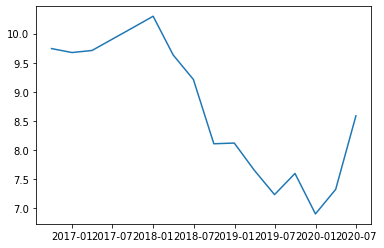

In [87]:
import matplotlib.pyplot as plt
plt.plot(vanguard_df.EffectToDate,vanguard_df.OwnTurnover)

Calculate DTW

In [88]:
#!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw, dtw_path
from tslearn.utils import to_time_series_dataset

In [89]:
from collections import defaultdict

Try one investor and compared with vanguard with DTW

In [90]:
vanguard_ts_ls = vanguard_df.OwnTurnover.to_list()
vanguard_ts_ls

[9.7415,
 9.6735,
 9.709,
 9.9025,
 10.0982,
 10.296,
 9.632,
 9.2121,
 8.1095,
 8.1213,
 7.6551,
 7.2374,
 7.6,
 6.9064,
 7.3269,
 8.588]

In [91]:
inv_ts_ls_test = inv_qu_list_df[inv_qu_list_df.LgcyInvestorId == 7016524].OwnTurnover.to_list()
inv_ts_ls_test

[20.8623,
 7.4348,
 8.5476,
 18.6006,
 40.8454,
 59.3847,
 67.8173,
 53.8877,
 38.1639,
 20.7433,
 145.2031,
 142.91,
 211.68,
 17.23]

In [92]:
DTW_score = dtw(vanguard_ts_ls, inv_ts_ls_test)
DTW_score

294.6770946175661

For each investor in the list

In [99]:
inv_find_DTW = inv_qu_list_df.LgcyInvestorId.drop_duplicates().to_list()

In [101]:
distance_to_vanguard_list = []
for i in inv_find_DTW:
  inv_ts_ls_test = inv_qu_list_df[inv_qu_list_df.LgcyInvestorId == i].OwnTurnover.to_list()
  DTW_score = dtw(vanguard_ts_ls, inv_ts_ls_test)
  distance_to_vanguard_list.append(DTW_score)

distance_to_vanguard_list

[294.6770946175661,
 30.985747392147896,
 149.42112587335168,
 218.95447826468407,
 33.54395418670852,
 68.37460525728832,
 6.057411478511264,
 267.05206351769687,
 16.42859748669983,
 677.6660684544416,
 134.33150689938677,
 104.80584629351551,
 143.0439574831807,
 395.7919821572312,
 76.21124390383613,
 940.9229515802396,
 26.210215179391415,
 588.4535642221992,
 118.57239704281938,
 579.19249074281,
 181.2432891154318,
 317.3820921648069,
 151.21942444365408,
 597.8582492707363,
 513.4107073361638,
 469.6969839446066,
 102.94868466517676,
 77.05133807047092,
 281.8913308780886,
 88.72083464851985,
 490.35777499270876,
 232.3835389239522,
 174.95855509768595,
 181.3697203476644,
 100.21347320934446,
 136.31932754686696,
 173.26290893878584,
 426.92685542990847,
 238.67704536877858,
 199.259079850455,
 101.13639157504089,
 117.46821680356777,
 127.1536188323793,
 129.4487173700072,
 390.6552061945418,
 166.6526083781169,
 5.004486003577193,
 90.43731673922,
 66.22098458494861,
 497.41

In [115]:
c = {
    "LgcyInvestorId":inv_find_DTW,
    "distance_to_vanguard":distance_to_vanguard_list
}
distance_data=pd.DataFrame(c).sort_values(by=['distance_to_vanguard'])
distance_data = distance_data[distance_data.LgcyInvestorId != 2004260]

In [117]:
df = pd.merge(distance_data,allo_name_df , how='left', on='LgcyInvestorId')

In [118]:
df.head()

,LgcyInvestorId,distance_to_vanguard,FullName
0,2003245,2.834711,State Street Global Advisors (US)
1,2002506,5.004486,BNY Mellon Asset Management
2,2006033,6.057411,Saturna Capital Corporation
3,2002468,8.706936,"Northern Trust Investments, Inc."
4,2627998,11.616703,"Geode Capital Management, L.L.C."


In [119]:
df.head(10)

,LgcyInvestorId,distance_to_vanguard,FullName
0,2003245,2.834711,State Street Global Advisors (US)
1,2002506,5.004486,BNY Mellon Asset Management
2,2006033,6.057411,Saturna Capital Corporation
3,2002468,8.706936,"Northern Trust Investments, Inc."
4,2627998,11.616703,"Geode Capital Management, L.L.C."
5,2003356,11.951287,"BlackRock Institutional Trust Company, N.A."
6,5505145,16.428597,BlackRock Asset Management Ireland Limited
7,2003800,18.081936,Legal & General Investment Management Ltd.
8,2587535,18.645178,Northern Trust Global Investments
9,2002019,26.210215,Berkshire Hathaway Inc.


In [122]:
df.tail(5)

,LgcyInvestorId,distance_to_vanguard,FullName
222,2529162,940.922952,"Graham Capital Management, L.P."
223,2639138,978.269665,BlueCrest Capital Management LLP
224,3706224,1052.308770,Capula Investment Management LLP
225,5520904,1064.680475,"Element Capital Management, LLC"
226,2502059,1284.112883,"MKP Capital Management, L.L.C."


In [121]:
df.to_csv(path_or_buf = '/content/gdrive/My Drive/capstone/distance_to_vanguard.csv')